# Students' Adaptability Level Prediction in Online Education

## About the Dataset

`Source`: The dataset has been downloaded from **Kaggle**.
* **Link**: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education/data

`Format`: The dataset is in the form of a CSV file.

`Context`: This dataset has been provided to try machine learning approaches to predict the students adaptability level in online education.

`Content`:

The **target** feature is

* `Adaptivity Level` - Adabtability level of the student

The **feature sets** are:
1. `Gender` - Gender type of the student
2. `Age` - Age range of the student
3. `Education Level` - Education institution level
4. `Institution Type` - Education institution type
5. `IT Student` - Studying as IT student or not
6. `Location` - Is student location in town
7. `Load-shedding` - Level of load shedding
8. `Financial Condition` - Financial condition of family
9. `Internet Type` - Internet type used mostly in device
10. `Network Type` - Network connectivity type
11. `Class Duration` - Daily class duration
12. `Self LMS` - Institution's own LMS availability
13. `Device:` - Device used mostly in class

`Inspiration`: To get an idea about the effectiveness of online education.


### **Objective**
The goal of this case study is to apply different machine learning algorithms on the dataset, choose the best algorithm by comparing their metrics and apply hyperparameter tuning on the best model to further improve its performance.

### Import libraries

In [65]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
# Neural Network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
# load the dataset
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Basic Information

In [4]:
df.shape

(1205, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


* There are **1205** observations and **14** columns in the dataset.
* All the columns are of data type **object** (categorical data).
* There are NO missing values in the dataset.

## Exploratory Data Analysis

The data is clean, so we'll just do some basic data exploration to understand the data.

#### Descriptive Statistics

In [7]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


Let's create some visualizations to have a look at the unique values and distribution of categories in different columns.

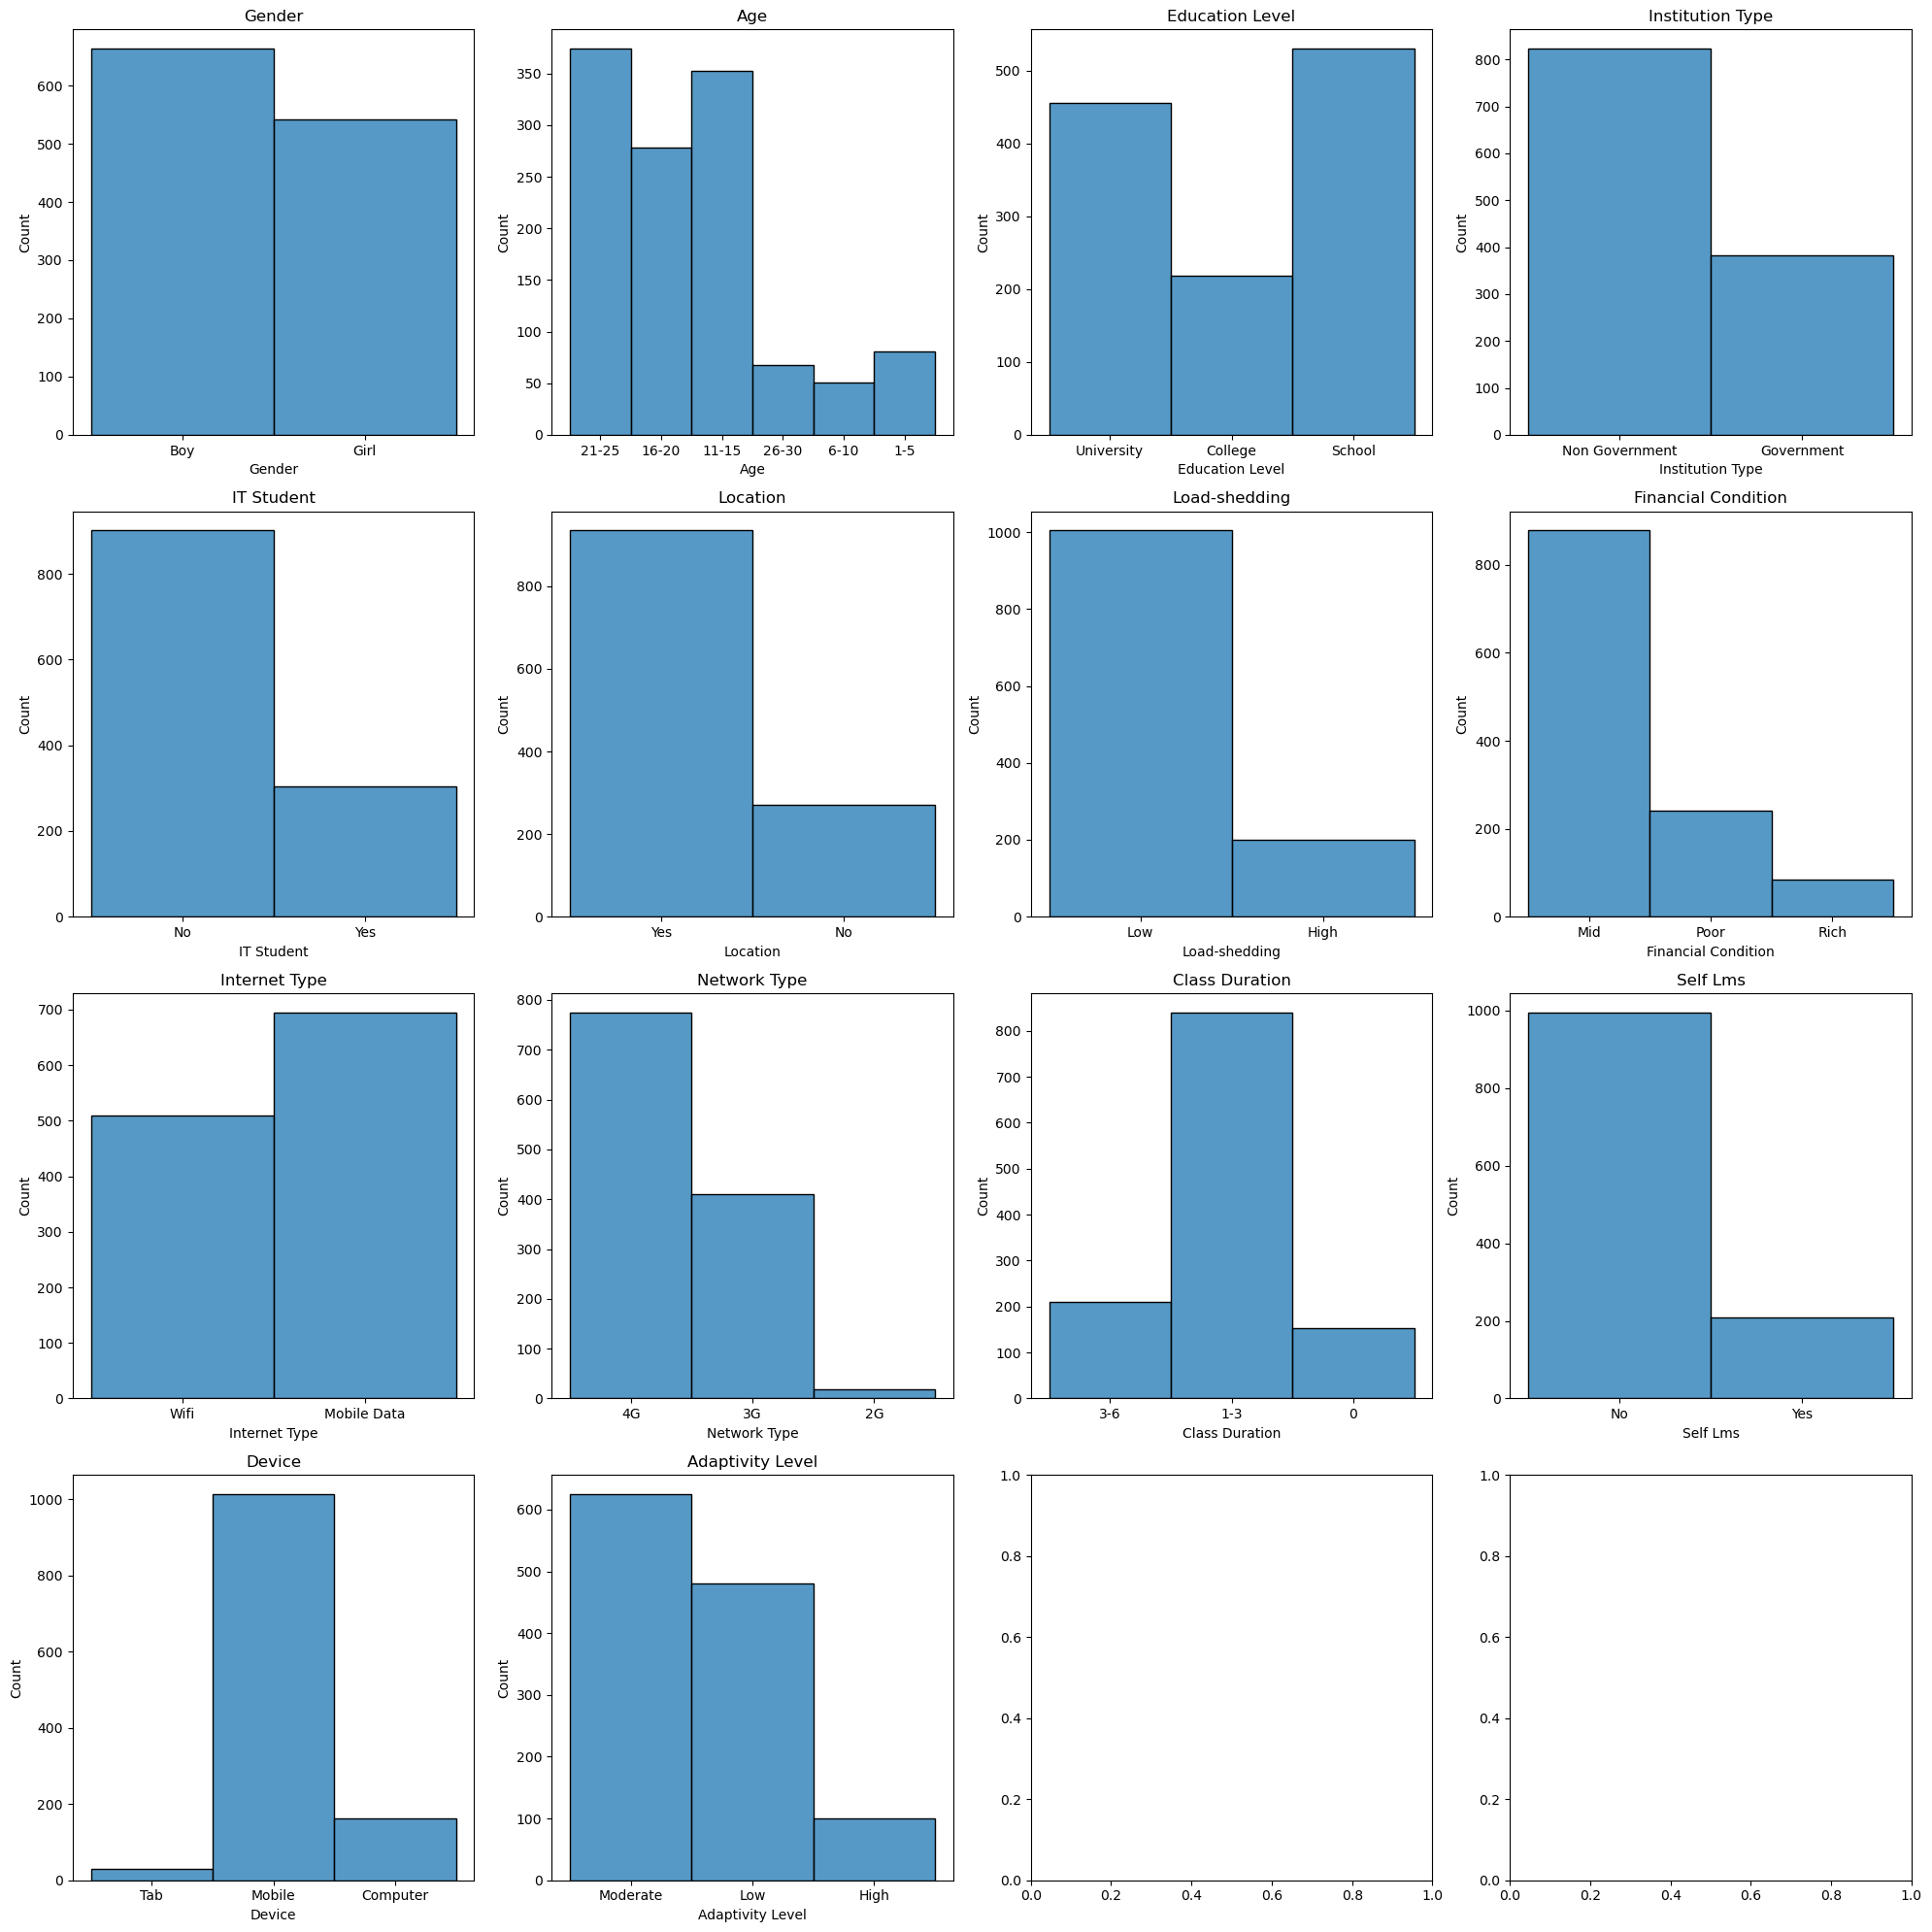

In [23]:
# Plotting distributions of numerical features
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(4):
    for j in range(4):
        if index < len(columns):
            sns.histplot(df[columns[index]], ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

## Data Preprocessing

### Encoding
We'll do label encoding of all columns.

In [38]:
# Creating a copy of the dataset to apply label encoding
df_encoded = df.copy()

# Create a dictionary to save label encoders for each column so that they can be decoded
label_encoders = {}

# List of columns to encode
categorical_cols = df.columns # all columns are categorical in this dataset

# Initialize LabelEncoder for each column and save it in the dictionary
for col in categorical_cols:
    le = LabelEncoder()
    # Apply Label Encoder to the column
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Display the first few rows of the encoded dataset
df_encoded.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


## **Machine Learning Algorithms**

We'll apply the following machine learning algorithms on this dataset:
* Logistic Regression
* Support Vector Machines (SVM)
* K-Nearest Neighbors (KNN)
* Decision Tree
* Naive Bayes (NB)
* Random Forest

### Split the data into features (X) and target variable (y)

In [39]:
# split the data into features (X) and target variable (y)
X = df_encoded.drop('Adaptivity Level', axis=1)
y = df_encoded['Adaptivity Level']

### Split the data into train and test sets

In [41]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying machine learning algorithms

In [43]:
# Initialize machine learrning models
log_reg = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier()

# Dictionary of models for easy iteration
models = {
    "Logistic Regression": log_reg,
    "SVM": svm,
    "KNN": knn,
    "Decision Tree": decision_tree,
    "Naive Bayes": naive_bayes,
    "Random Forest": random_forest
}

# Training and evaluating the models
# Function to calculate metrics
def calculate_metrics(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    error_rate = 1 - accuracy
    return accuracy, precision, recall, f1, error_rate

# Calculating metrics for each model
metrics = {model_name: calculate_metrics(model) for model_name, model in models.items()}
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1 Score", "Error Rate"]).T

metrics_df

,Accuracy,Precision,Recall,F1 Score,Error Rate
Logistic Regression,0.688797,0.702282,0.688797,0.680374,0.311203
SVM,0.771784,0.793444,0.771784,0.766636,0.228216
KNN,0.800830,0.799309,0.800830,0.795237,0.199170
Decision Tree,0.892116,0.892105,0.892116,0.890486,0.107884
Naive Bayes,0.618257,0.665887,0.618257,0.589570,0.381743
Random Forest,0.900415,0.900367,0.900415,0.898463,0.099585


### Visualizing Evaluation Metrics

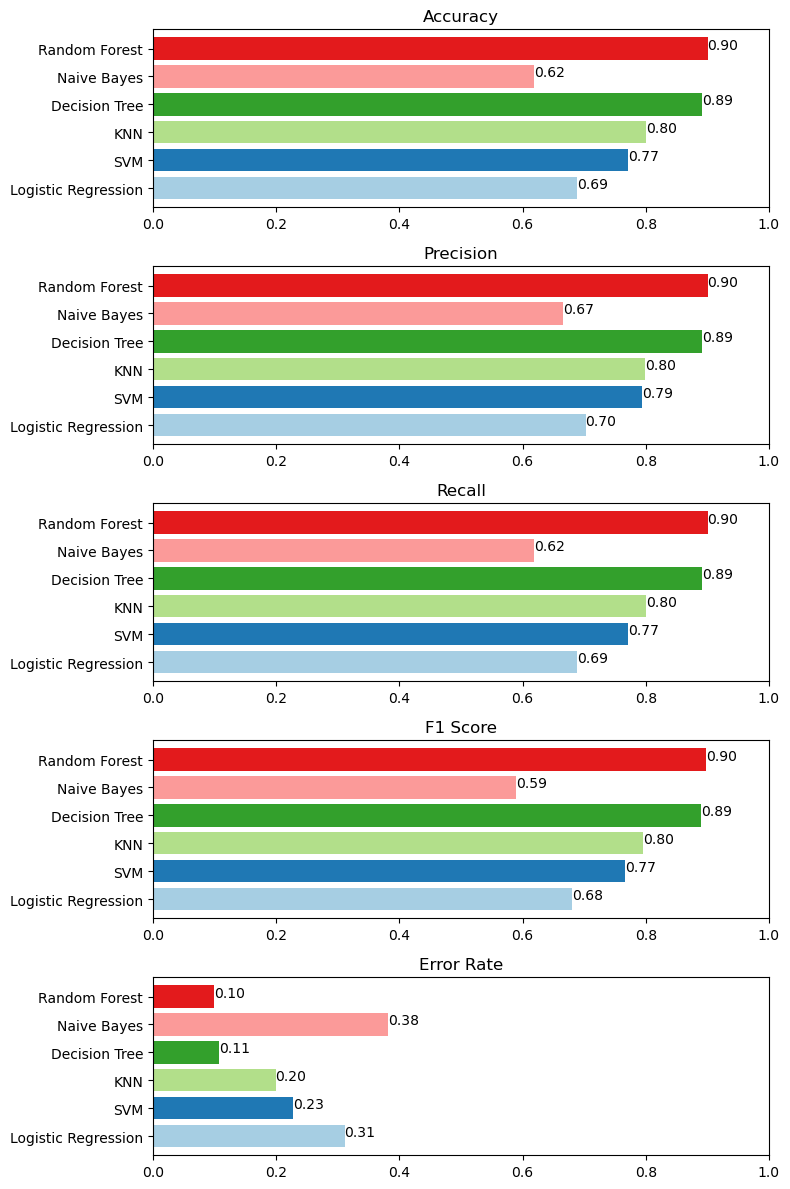

In [61]:
# Plotting horizontal bar chart for each metric
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
for i, metric in enumerate(metrics_df.columns):
    axes[i].barh(metrics_df.index, metrics_df[metric], color=plt.cm.Paired(np.arange(len(metrics_df))))
    axes[i].set_title(metric)
    axes[i].set_xlim(0, 1)  # Setting limit from 0 to 1 as all metrics are in this range
    for index, value in enumerate(metrics_df[metric]):
        axes[i].text(value, index, f'{value:.2f}')
plt.tight_layout()
plt.show()

### **Observations:**
`Random Forest Classifier` has the maximum accuracy, precision, recall, and F1 score. It also has the lowest error rate.

### Applying Neural Network
Let's apply deep learning algorithm to check its accuracy.

In [63]:
# Create the model and add layers
# -----------------------------------------------------------------------------------------------
# Create the model
model = Sequential()

# Add layers
# First layer - expects input of 13 features
model.add(Dense(13, input_dim=13, activation='relu')) # input layer

# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(26, activation='relu')) # hidden layer

# Last layer - softmax function to output 0, 1, or 2(our label)
model.add(Dense(1, activation='softmax')) # output layer

# Compile the Model
# -------------------------------------------------------------------------------------------------
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit (Train) the Model
# -------------------------------------------------------------------------------------------------
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
31/31 - 6s - loss: 0.4811 - accuracy: 0.3911 - 6s/epoch - 198ms/step
Epoch 2/100
31/31 - 0s - loss: -3.1484e-01 - accuracy: 0.3911 - 96ms/epoch - 3ms/step
Epoch 3/100
31/31 - 0s - loss: -1.4442e+00 - accuracy: 0.3911 - 87ms/epoch - 3ms/step
Epoch 4/100
31/31 - 0s - loss: -3.2742e+00 - accuracy: 0.3911 - 76ms/epoch - 2ms/step
Epoch 5/100
31/31 - 0s - loss: -6.5026e+00 - accuracy: 0.3911 - 70ms/epoch - 2ms/step
Epoch 6/100
31/31 - 0s - loss: -1.2344e+01 - accuracy: 0.3911 - 79ms/epoch - 3ms/step
Epoch 7/100
31/31 - 0s - loss: -2.2742e+01 - accuracy: 0.3911 - 96ms/epoch - 3ms/step
Epoch 8/100
31/31 - 0s - loss: -3.8445e+01 - accuracy: 0.3911 - 119ms/epoch - 4ms/step
Epoch 9/100
31/31 - 0s - loss: -6.0603e+01 - accuracy: 0.3911 - 89ms/epoch - 3ms/step
Epoch 10/100
31/31 - 0s - loss: -9.1313e+01 - accuracy: 0.3911 - 120ms/epoch - 4ms/step
Epoch 11/100
31/31 - 0s - loss: -1.2988e+02 - accuracy: 0.3911 - 181ms/epoch - 6ms/step
Epoch 12/100
31/31 - 0s - loss: -1.7886e+02 - accuracy

### **Observations:**
Neural Network has the lowest accuracy than all other machine learning models. Even after 100 epochs, the accuracy still can't be improved.


## Best Model
Based on the above calculations and visualizations, `Random Forest Classifier` is the BEST model. Now we'll apply hyperparameter tuning to this model to improve it further.

## **Hyperparameter Tuning**

In [73]:
# Parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.9128616148531952


### **Observations:**

After hyperparameter tuning, accuracy has improved by almost 1%.

#### Best Accuracy: **0.912862**

#### Best Parameters:
Following are the best parameters for Random Forest Classifier:
* `bootstrap` - False
* `max_depth` - 40
* `max_features` - sqrt
* `min_samples_leaf` - 1
* `min_samples_split` - 2
* `n_estimators` - 10

## Predict Students' Adaptability Level using the Best Model with Best Hyperparameters

In [76]:
# predict on test data
y_pred = grid_search.predict(X_test)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

# print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Error Rate:", error_rate)

Accuracy: 0.9087136929460581
Precision: 0.9080907051617328
Recall: 0.9087136929460581
F1 Score: 0.9065902400964642
Error Rate: 0.09128630705394192
